<a href="https://colab.research.google.com/github/Elispreng/Project-2/blob/main/Spreng_Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data and libraries

In [2]:
#import libraries and metrics 

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#Classification Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay
## Tree Model Visualization
from sklearn.tree import plot_tree

## Import Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

##Set up configuation display
from sklearn import set_config
set_config(display='diagram') # 'text' or 'diagram'}


In [3]:
# import pandas, numpy and load google drive
import pandas as pd
import numpy as np

from google.colab import drive


In [4]:
#load data and create dataframe
filename2 = '/content/drive/MyDrive/Project 2/adult[1].csv'
adult_df = pd.read_csv(filename2)

# Data Preparation and Initial Cleaning

## Inspect Data

In [5]:
#  Inspect the first (5) rows of the dataframe
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- The data has loaded correctly. 

In [6]:
## Display the number of rows and columns for the dataframe
adult_df.shape
print(f'There are {adult_df.shape[0]} rows, and {adult_df.shape[1]} columns.')
print(f'The rows represent {adult_df.shape[0]} participants, and the columns represent {adult_df. shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 participants, and the columns represent 14 features and 1 target variable.


In [7]:
# check the info
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Inspect Columns for Datatypes

In [8]:
## Display column names and datatypes
adult_df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

- All columns datatyoes appear correct. 

### Inspect Column Names for Errors

In [9]:
## Display column names
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Inspect Values for Errors


## Clean the data

### Remove Unnecessary Columns


- There are not any unnecessary columns.

### Remove Unnecessary Rows

### Duplicates

In [10]:
# Display the number of duplicate rows
print(f'There are {adult_df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [11]:
# Drop duplicate rows
adult_df = adult_df.drop_duplicates()

In [12]:
# Check for duplicates
adult_df.duplicated().sum()

0

- There are zero duplicate rows. 

### Missing Values

In [13]:
# Checking for missing values
adult_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- There are 0 missing values

## Check for Inconsistencies

## Fix the column datatypes

- I have left the "?" entries in parathesis at the end of each column to be addressed in preparation for test/train split. 

In [14]:
# Check the numeric columns for inconsistencies
adult_df.describe(include="number")


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# Check the object columns for inconsistencies
adult_df.describe(include="object")


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


## Column 8: Race (no visible problems)

In [16]:
# Check the 'race' column for inconsistencies
adult_df['race'].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

## Column 7: Relationship (no visible problems)

In [17]:
# Check the 'relationship' column for inconsistencies
adult_df['relationship'].value_counts()

Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

## Column 13: Native Country (8562?)

In [18]:
adult_df['native-country'].value_counts()

United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

- There are 856 entries of "?". These are type of "missing value" that should be handled by one hot encoder

## Column 1: Work/class (2795?)

In [19]:
# check Work/class column
adult_df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

- There are 2795 '?'- these need to be changed. 

## Column 3: Education (no visible problems)

In [20]:
# check education
adult_df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

- No noticeable problems with these values. 

## Column 6: Occupation (2805)

In [21]:
# check occupation column
adult_df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

- There are 2805 '?' to be addressed

In [22]:
# check Work/class column
adult_df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

## Column 9: Gender 

In [23]:
# check gender column
adult_df['gender'].value_counts()

Male      32614
Female    16176
Name: gender, dtype: int64

## Column 14: Income (Target)

In [24]:
# check income column
adult_df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

# Exploratory Visuals

## Visuals for Numeric Values

### Visuals 1 and 2 for gains and losses

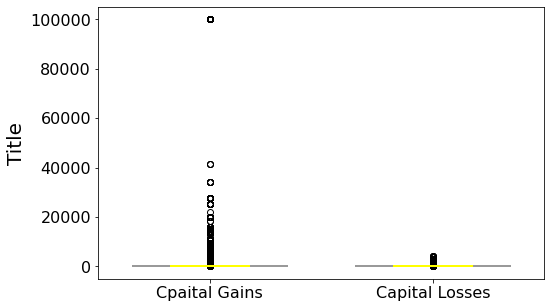

In [27]:
# create boxplots for the mean of capital gains  and capital losses

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([adult_df['capital-gain'], adult_df['capital-loss']],
           notch = True,
           labels=['Cpaital Gains', 'Capital Losses'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('orange')
plt.ylabel('Title', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

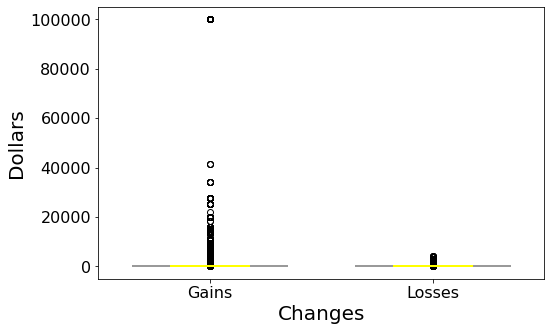

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([adult_df['capital-gain'], adult_df['capital-loss']],
           notch = True,
           labels=['Gains','Losses'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('orange')
plt.xlabel('Changes', fontsize = 20);
plt.ylabel('Dollars', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

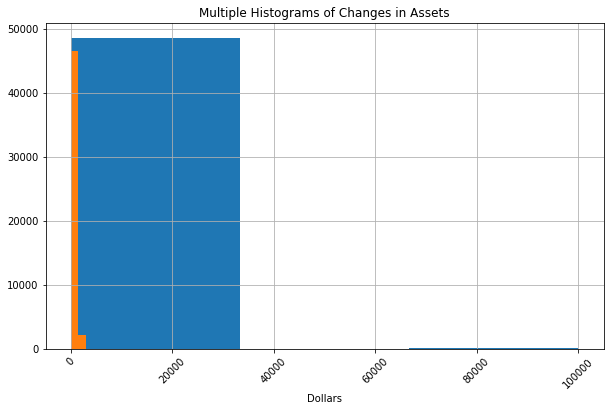

In [29]:
# histogram for capital gains and losses

plt.figure(figsize=(10,6))
adult_df['capital-gain'].hist(bins = 3)
adult_df['capital-loss'].hist(bins=3)

plt.xlabel("Dollars")
plt.title("Multiple Histograms of Changes in Assets")
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("overlapping_histograms_with_matplotlib_Python.png")


- There is  range of capital gains that creates a skewed visual for capital gains. 

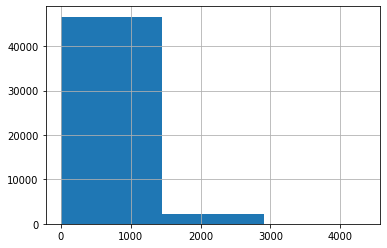

In [30]:
# Capital loss single histogram
adult_df['capital-loss'].hist(bins=3);


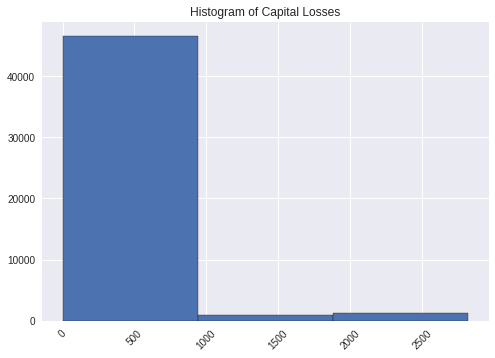

In [31]:
# Adding seaborn style 
plt.style.use('seaborn')
loss_filter = adult_df.loc[:, 'capital-loss'] <= 3000
adult_df.loc[loss_filter, 'capital-loss'].hist(bins = 3,
                                   edgecolor='black')

plt.title("Histogram of Capital Losses")
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

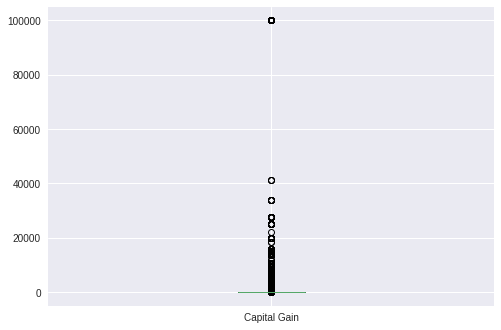

In [32]:
# single boxplot for capital gains
# Boxplot for age
plt.boxplot(adult_df['capital-gain'], labels=['Capital Gain']);


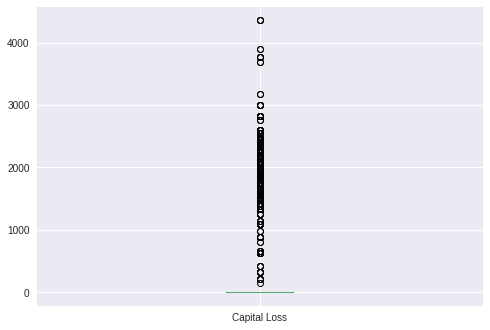

In [33]:
#single boxplot for capital loss
# Boxplot for age
plt.boxplot(adult_df['capital-loss'], labels=['Capital Loss']);


### Visual #3: Age

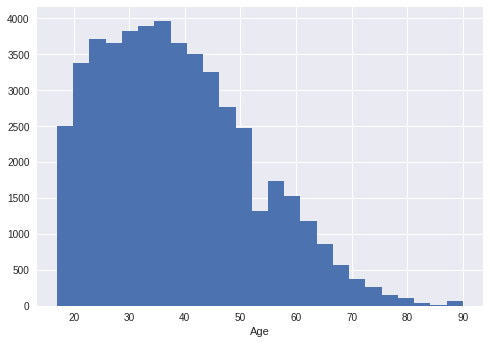

In [34]:
adult_df['age'].hist(bins = 25)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Age");

ValueError: ignored

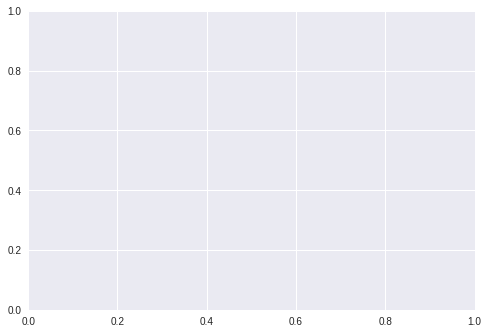

In [37]:
age = adult_df.loc[adult_df['age']=='Age', ]
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([age], notch = True, labels=['A']);

TypeError: ignored

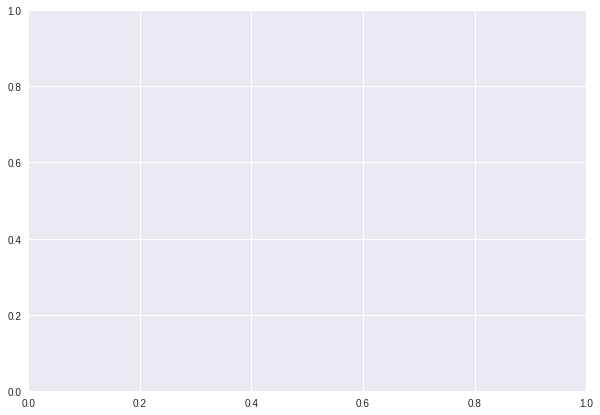

In [38]:
age = adult_df.loc[adult_df['age']]

 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(age)
 
# show plot
plt.show()

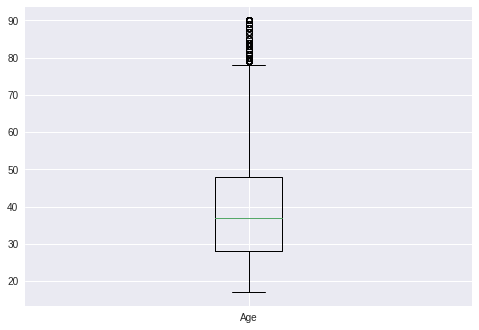

In [39]:
# Boxplot for age
plt.boxplot(adult_df['age'], labels=['Age']);


### Visual #4:  Country of Origin Visuals

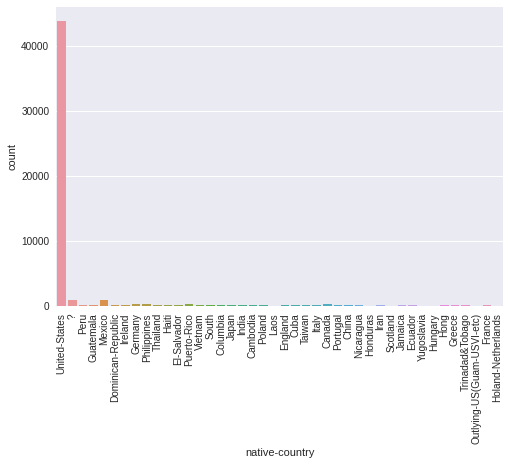

In [40]:
# First visuals of country of Origin
sns.countplot(x=adult_df["native-country"]);
plt.xticks(rotation = 90);


In [41]:
country_filter = adult_df.loc['native-country' == 'Mexico', 'Phillippines', 'Germany', 'Puerto-Rico' ]

IndexingError: ignored

In [44]:
country_filter = adult_df.loc['native-country' == 'Germany']

KeyError: ignored

In [43]:
country_filter = adult_df[adult_df['native-country'] == 'United States']


In [42]:
sns.countplot(x=adult_df[country_filter]);
plt.xticks(rotation = 90);

NameError: ignored

### Visual #5 Relationship

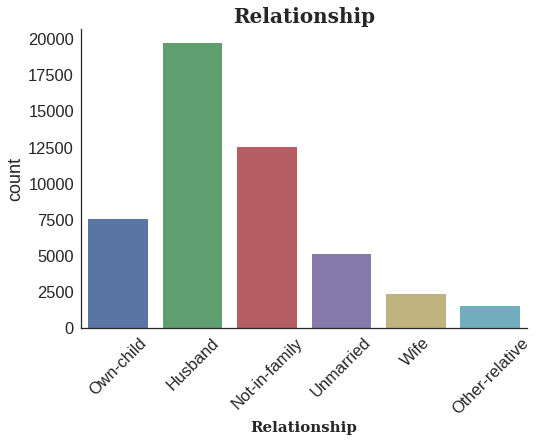

In [47]:
#create relationship countplot
sns.set_context('talk')
with plt.style.context('seaborn-white'):
  fig, ax =plt.subplots()
plt.rcParams['font.family'] = 'serif'
ax = sns.countplot(data=adult_df,x='relationship')
ax.set_title('Relationship', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Relationship', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 45);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

### Visual #6 Race

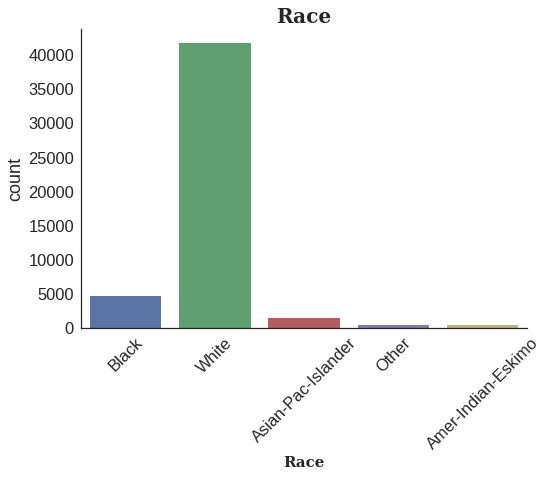

In [48]:
#create race countplot
sns.set_context('talk')
with plt.style.context('seaborn-white'):
  fig, ax =plt.subplots()
plt.rcParams['font.family'] = 'serif'
ax = sns.countplot(data=adult_df,x='race')
ax.set_title('Race', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Race', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 45);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

### Visual #7: Gender

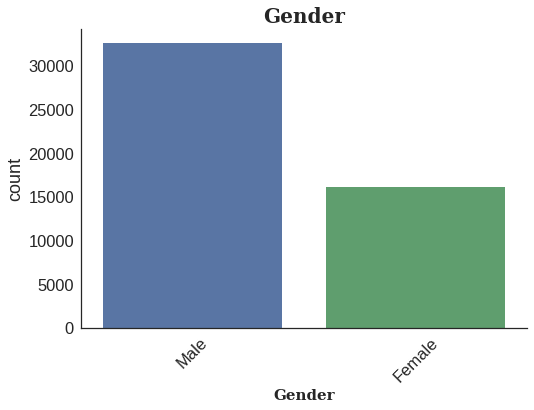

In [49]:
#create race countplot
sns.set_context('talk')
with plt.style.context('seaborn-white'):
  fig, ax =plt.subplots()
plt.rcParams['font.family'] = 'serif'
ax = sns.countplot(data=adult_df,x='gender')
ax.set_title('Gender', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Gender', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 45);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

### Visual #8: Education with countplot

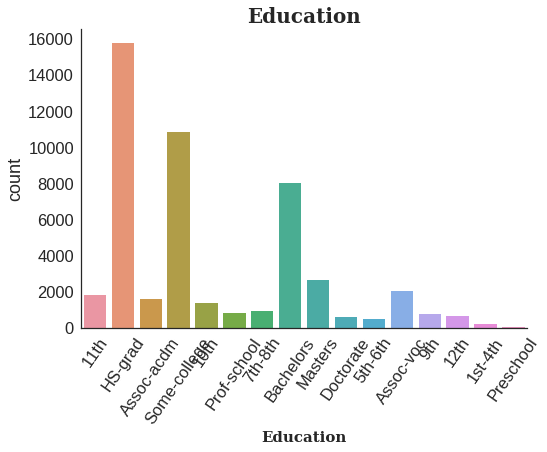

In [50]:
#create preliminary countplot for education
sns.set_context('talk')
with plt.style.context('seaborn-white'):
  fig, ax =plt.subplots()
plt.rcParams['font.family'] = 'serif'
ax = sns.countplot(data=adult_df,x='education')
ax.set_title('Education', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Education', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 55);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

### Visual #10 Education (numeric)

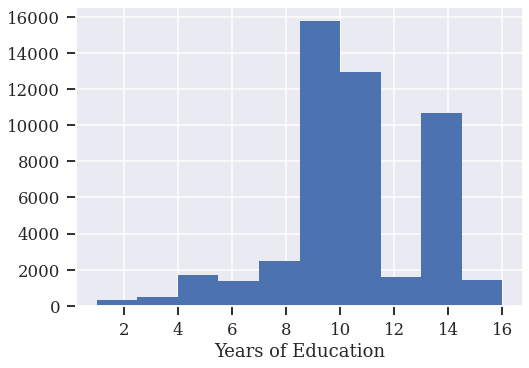

In [51]:
# preliminary historgram for education numeric
adult_df['educational-num'].hist(bins = 10)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Years of Education");


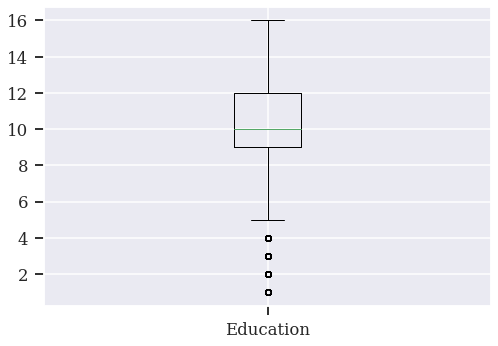

In [52]:
#Box plot for education numeric
# Boxplot for age
plt.boxplot(adult_df['educational-num'], labels=['Education']);


### Visual #11: Occupation

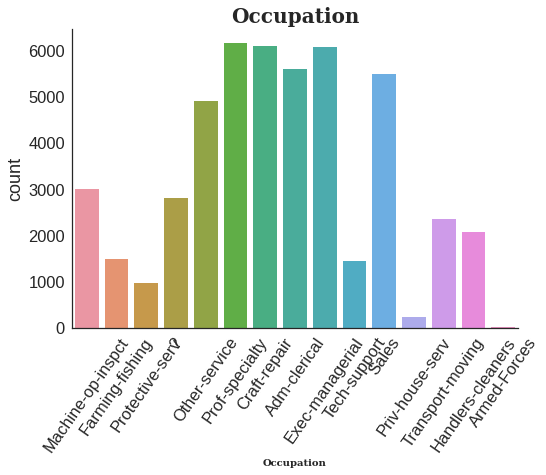

In [53]:
sns.set_context('talk')
with plt.style.context('seaborn-white'):
  fig, ax =plt.subplots()
plt.rcParams['font.family'] = 'serif'
ax = sns.countplot(data=adult_df,x='occupation')
ax.set_title('Occupation', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Occupation', fontfamily= 'serif', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 55);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

### Visual #12: Hours Worked per Week

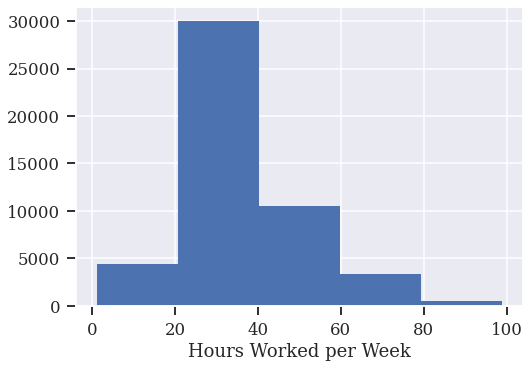

In [54]:
## histogram for hours per week
adult_df['hours-per-week'].hist(bins = 5)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Hours Worked per Week");


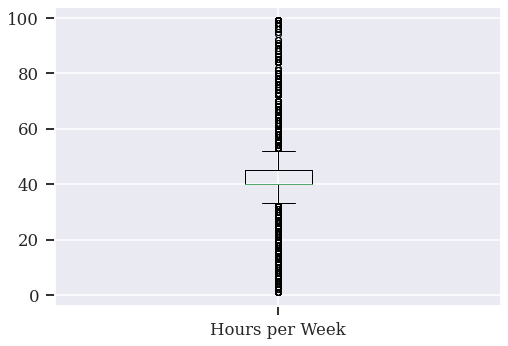

In [55]:
# Boxplot for hours per week# Boxplot for age
plt.boxplot(adult_df['hours-per-week'], labels=['Hours per Week']);


### Visual 13: Weighting (column 2)

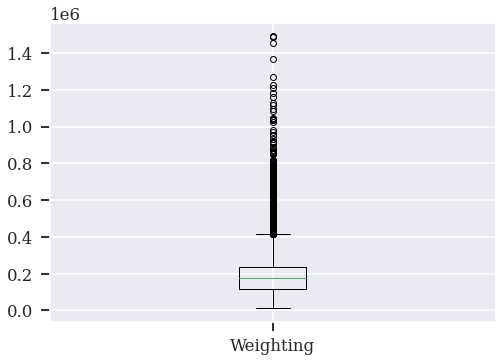

In [56]:
# Boxplot for age
plt.boxplot(adult_df['fnlwgt'], labels=['Weighting']);


# Outliers from Boxplots Summary


1.   Age: Outliers +78
2.   Weighting: Outliers at +0.4
3.   Education Numeric: Outliers at less than 5 years
4.   Capital Gain: Outliers over 20,000
5.   Capital Loss: Outliers  over 500
6.   Hours per Week: Outliers under 30 hours and over 50 hours 



# Summary and Further Recommendations


1.   Outliers: Exist in the income column at over 100,000. There also outliers in capital  gains and losses. 
2.   The data is heavily skewed to United States as native country
3.   The discrepancy between husband and wife
4.   In education there are a few of the preschool category, this needs more investigation
5.   Relationship, race, gender, occupation, and hours worked per week have no noticable issues. However in the current US demographics there are many individuals who do not identify as male or female. 








## I look forward to having a one-on-one to work on exploratory visuals and discuss further steps on the data. 

## Visuals for Part 3

In [25]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, hue = adult_df['income'], figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot
    
    ## counts, counts up the categories, sort the values, then puts them in a 
    ## data frame.
    
    counts = adult_df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

## Visual #1: Still under some construction

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64


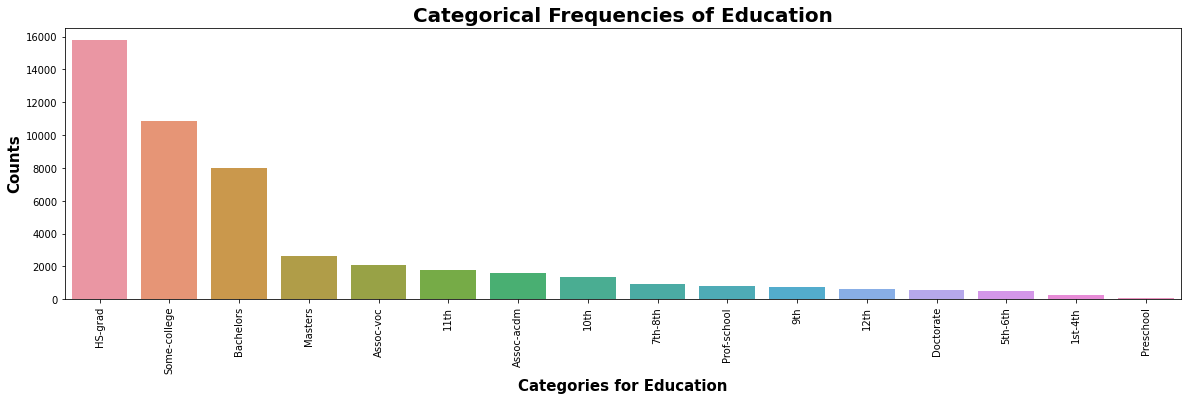

In [26]:
fig, ax = plot_bar(adult_df, 'education', 'Education');
print(adult_df['education'].value_counts())

- This barplot needs to have income added to it but it is interesting that the highest count is for HS-grads. 

## Visual #2: (Might be a bit too much info)

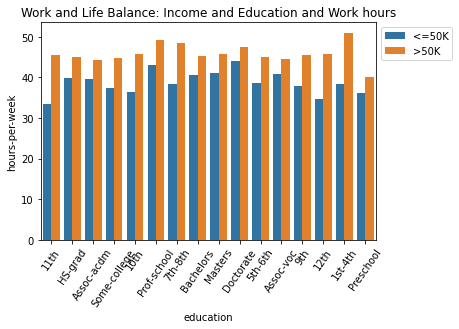

In [30]:
#Plot Income by education and 
sns.barplot(data = adult_df, x = 'education', y = 'hours-per-week', hue ='income',ci=None)
plt.title('Work and Life Balance: Income and Education and Work hours')
plt.xticks(rotation = 55);
plt.legend(bbox_to_anchor = (1, 1));

- There is surprising outcome in this barplot. The group was less formal education or (1st-4th) work the most and yet there is a signficant number of over 50K.  Another  trend that is not surprising is  higher  hours work seem to correlate with higher income regardless of education. Finally, education does not necessarily correlate to  higher income (but more investigation of the data is needed). 

## Visual #3: Under construction (might be seperated into 2 visuals)

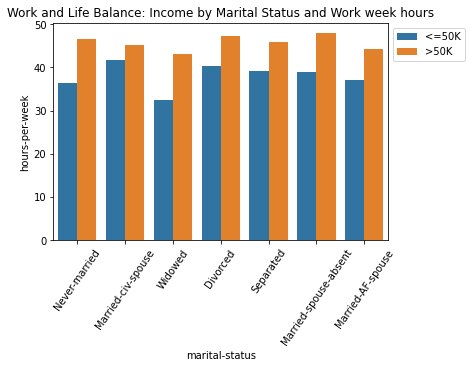

In [27]:
#Plot Income by marital status and hours per week
sns.barplot(data = adult_df, x = 'marital-status', y = 'hours-per-week', hue ='income',ci=None)
plt.title('Work and Life Balance: Income by Marital Status and Work week hours')
plt.xticks(rotation = 55);
plt.legend(bbox_to_anchor = (1, 1));

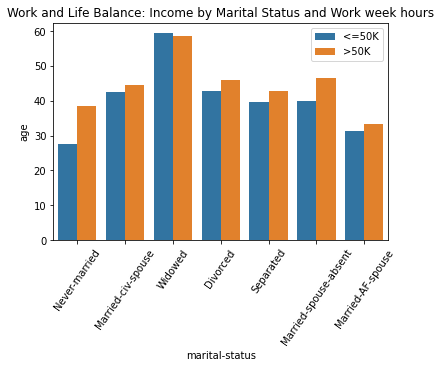

In [28]:
#Plot Income by marital status and hours per week
sns.barplot(data = adult_df, x = 'marital-status', y= 'age', hue ='income',ci=None)
plt.title('Work and Life Balance: Income by Marital Status and Age')
plt.xticks(rotation = 55);
plt.legend(bbox_to_anchor = (1, 1));

- There are many interesting trends in this barplot. First, the widowed plot stands out with under 50K  group slightly larger. The second  group that stands out is the Married (spouse absent) group with a significant amount of  >50K, I would like to work on this plot more. 